In [137]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model

In [102]:
df_1 = pd.read_csv('../../data/BLI_06042018023341088.csv')
print(df_1['Indicator'].unique())

['Labour market insecurity'
 'Stakeholder engagement for developing regulations'
 'Feeling safe walking alone at night'
 'Dwellings without basic facilities' 'Housing expenditure'
 'Rooms per person' 'Household net adjusted disposable income'
 'Household net financial wealth' 'Employment rate'
 'Long-term unemployment rate' 'Personal earnings'
 'Quality of support network' 'Educational attainment' 'Student skills'
 'Years in education' 'Air pollution' 'Water quality' 'Voter turnout'
 'Life expectancy' 'Self-reported health' 'Life satisfaction'
 'Homicide rate' 'Employees working very long hours'
 'Time devoted to leisure and personal care']


In [103]:
df_1[df_1['Indicator']=='Life satisfaction'].head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2859,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2860,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.0,NaN,NaN
2861,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
2862,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2863,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.6,NaN,NaN


In [172]:
df_1t = df_1[(df_1['Indicator']=='Life satisfaction' & df_1['INEQUALITY'=='TOT'])]
#df_1.any?
df_1t[df_1t['Country']=='Australia']

KeyError: False

In [104]:
df_1[df_1['Indicator']=='Life satisfaction'].to_csv('data/life_satisfaction.csv', columns=['Country', 'Value'], index=False)

In [105]:
#df_2 = pd.read_csv('../../data/IMF_GDP_WEOApr2016all.csv', low_memory=False)
#df_2['Subject Descriptor'].unique()

In [106]:
#df_2t = df_2[df_2['Subject Descriptor']=='Gross domestic product per capita']
#with pd.option_context('display.max_rows', 1, 'display.max_columns', None):
#    print(df_2t)

In [107]:
#df_2t = df_2[df_2['Subject Descriptor']=='Gross domestic product per capita']
#df_2t[['1998', '1999', '2017']]
#with pd.option_context('display.max_rows', 1, 'display.max_columns', None):
#    print(df_2)
#df_2t.to_csv('data/gdp_per_capita.csv', columns=['Country', '2017'], index=False)

In [130]:
df_2 = pd.read_csv('../../data/imf_gdp_percapita_usd.aspx', sep='\t', encoding = "ISO-8859-1", thousands=',')
df_2.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2017,Estimates Start After
0,Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50795.304,2014.0
1,Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",46316.646,2015.0
2,Belgium,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",41595.951,2014.0
3,Canada,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",41921.353,2015.0
4,Cyprus,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",23502.828,2014.0


In [131]:
df_2.to_csv('data/gdp_per_capita.csv', columns=['Country', '2017'], index=False)

In [132]:
df_gdp = pd.read_csv('data/gdp_per_capita.csv', index_col='Country')
df_gdp.head()

,2017
Country,
Australia,50795.304
Austria,46316.646
Belgium,41595.951
Canada,41921.353
Cyprus,23502.828


In [158]:
df_ls = pd.read_csv('data/life_satisfaction.csv', index_col='Country')
df_ls.head()

,Value
Country,
Australia,7.3
Austria,7.0
Belgium,6.9
Canada,7.3
Czech Republic,6.6


In [156]:
df_m = pd.merge(df_ls, df_gdp, left_index=True, right_index=True)
#df_m = df_m.rename(columns={'Value': 'LIFS', '2017': 'gdpp_2017'})#LIFS = Life Satisfaction, dgpp_2017= GDP per capita 2017
df_m.head()

,Value,2017
Country,,
Australia,7.3,50795.304
Australia,7.2,50795.304
Australia,7.4,50795.304
Australia,7.5,50795.304
Australia,7.2,50795.304


In [135]:
df_m.dtypes

LIFS         float64
gdpp_2017    float64
dtype: object

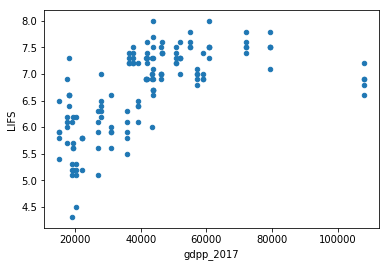

In [136]:
%matplotlib inline
df_m.plot.scatter('gdpp_2017', 'LIFS')

In [142]:
model = sklearn.linear_model.LinearRegression()
X = np.c_[df_m['gdpp_2017']]
Y = np.c_[df_m['LIFS']]
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [152]:
df_m.iloc[0]

LIFS             7.300
gdpp_2017    50795.304
Name: Australia, dtype: float64

In [155]:
df_m.loc['Australia']

,LIFS,gdpp_2017
Country,,
Australia,7.3,50795.304
Australia,7.2,50795.304
Australia,7.4,50795.304
Australia,7.5,50795.304
Australia,7.2,50795.304
